# Tutorial 2: Statistical Concepts and Visualization

---

## Learning Objectives

By the end of this tutorial, you will be able to:
1. Compute and understand **Mean** and **Median** as measures of central tendency
2. Create and interpret **Histograms** with frequency and density
3. Understand the relationship between **Sample** and **Population** distributions
4. Verify the **Law of Large Numbers (LLN)** and **Central Limit Theorem (CLT)**

---

In [3]:
%pip install matplotlib numpy scipy


[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

---

# Part 1: Mean and Median as Measures of Central Tendency

---

## 1.1 What are Measures of Central Tendency?

Measures of central tendency are single values that attempt to describe a dataset by identifying the **central position** within that set of data.

### Mean (Arithmetic Average)
The **mean** is the sum of all values divided by the number of values:

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

**Property**: The mean minimizes the **sum of squared distances** from all data points.

### Median
The **median** is the middle value when data is ordered. For $n$ values:
- If $n$ is odd: median is the n+1/2 th value
- If $n$ is even: median is the average of n/2 th and  n/2 + 1 th values

**Property**: The median minimizes the **sum of absolute distances** from all data points.

## 1.2 Computing Mean and Median

In [5]:
# Create a simple numerical dataset
data = np.array([2, 4, 5, 7, 8, 10, 12, 15, 18, 20])

# Compute mean and median
mean_value = np.mean(data)
median_value = np.median(data)

print(f"Dataset: {data}")
print(f"\nMean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")

Dataset: [ 2  4  5  7  8 10 12 15 18 20]

Mean: 10.10
Median: 9.00


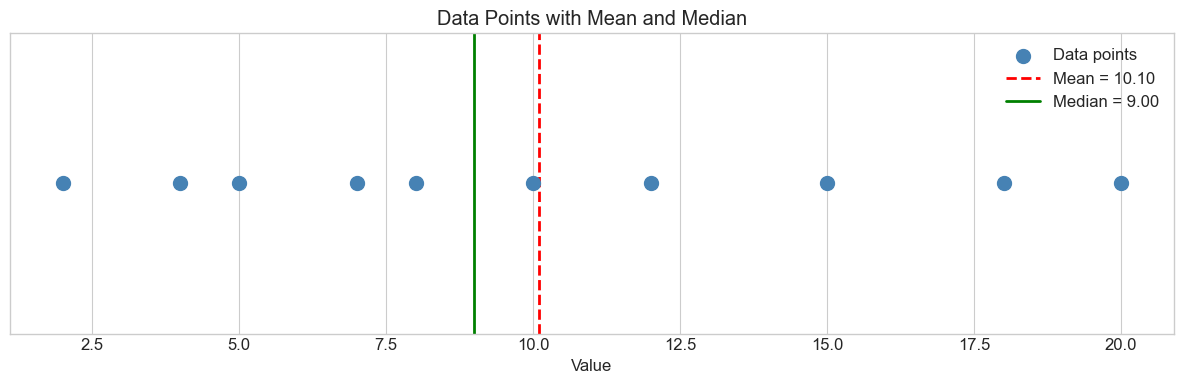

In [6]:
# Visualize the data with mean and median
plt.figure(figsize=(12, 4))

plt.scatter(data, np.zeros_like(data), s=100, c='steelblue', zorder=5, label='Data points')
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='-', linewidth=2, label=f'Median = {median_value:.2f}')

plt.xlabel('Value')
plt.yticks([])
plt.title('Data Points with Mean and Median')
plt.legend()
plt.tight_layout()
plt.show()

## 1.3 Median Minimizes Cumulative Absolute Distance

For any candidate center $c$, the **cumulative absolute distance** is:

$$D(c) = \sum_{i=1}^{n} |x_i - c|$$

Let's verify that the **median minimizes this distance**.

In [7]:
# Define function to compute cumulative absolute distance
def cumulative_absolute_distance(data, center):
    return np.sum(np.abs(data - center))

# Create range of candidate centers (including data points themselves)
candidate_centers = np.linspace(min(data) - 2, max(data) + 2, 500)

# Compute cumulative absolute distance for each candidate
distances = [cumulative_absolute_distance(data, c) for c in candidate_centers]

# Also compute for the data points themselves
data_point_distances = [cumulative_absolute_distance(data, x) for x in data]

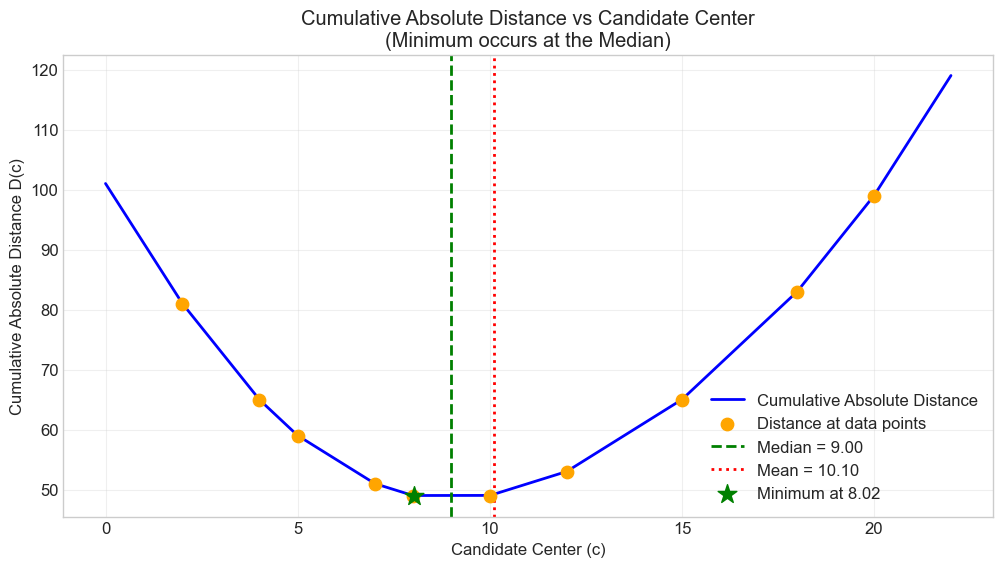


Verification:
Minimum distance occurs at: 8.0240
Median of data: 9.0000
Distance at median: 49.0000
Distance at mean: 49.2000


In [ ]:
# Plot cumulative absolute distance vs candidate center
plt.figure(figsize=(12, 6))

plt.plot(candidate_centers, distances, 'b-', linewidth=2, label='Cumulative Absolute Distance')
plt.scatter(data, data_point_distances, s=80, c='orange', zorder=5, label='Distance at data points')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median = {median_value:.2f}')
plt.axvline(mean_value, color='red', linestyle=':', linewidth=2, label=f'Mean = {mean_value:.2f}')

# Mark the minimum
min_idx = np.argmin(distances)
plt.scatter([candidate_centers[min_idx]], [distances[min_idx]], s=200, c='green', marker='*', zorder=6, label=f'Minimum at {candidate_centers[min_idx]:.2f}')

plt.xlabel('Candidate Center (c)')
plt.ylabel('Cumulative Absolute Distance D(c)')
plt.title('Cumulative Absolute Distance vs Candidate Center\n(Minimum occurs at the Median)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVerification:")
print(f"Minimum distance occurs at: {candidate_centers[min_idx]:.4f}")
print(f"Median of data: {median_value:.4f}")
print(f"Distance at median: {cumulative_absolute_distance(data, median_value):.4f}")
print(f"Distance at mean: {cumulative_absolute_distance(data, mean_value):.4f}")

### Key Observation

The minimum of the cumulative absolute distance function occurs at the **median**, not at the mean. This is a fundamental property that distinguishes these two measures of central tendency:

- **Median** → Minimizes sum of absolute deviations ($L_1$ norm)
- **Mean** → Minimizes sum of squared deviations ($L_2$ norm)

## 1.4 Mean vs Median in Skewed Distributions

### Left-Skewed (Negatively Skewed) Distribution
- The tail extends to the **left** (towards lower values)
- Mean < Median (mean is pulled towards the tail)

### Right-Skewed (Positively Skewed) Distribution
- The tail extends to the **right** (towards higher values)
- Mean > Median (mean is pulled towards the tail)

In [9]:
# Generate skewed distributions
np.random.seed(42)

# Right-skewed: Exponential distribution
right_skewed = np.random.exponential(scale=2, size=1000)

# Left-skewed: Reflected exponential (subtract from max)
left_skewed = np.max(right_skewed) - np.random.exponential(scale=2, size=1000)

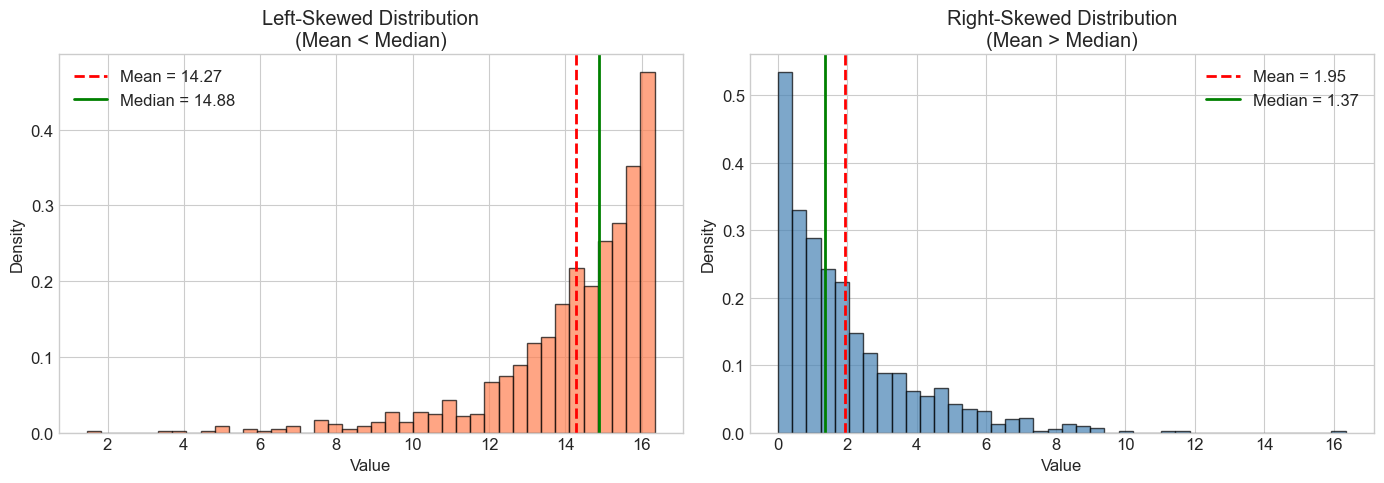


OBSERVATIONS:

Left-Skewed Distribution:
  Mean = 14.2747
  Median = 14.8822
  Mean - Median = -0.6076 (NEGATIVE → Mean < Median)

Right-Skewed Distribution:
  Mean = 1.9450
  Median = 1.3736
  Mean - Median = 0.5714 (POSITIVE → Mean > Median)


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left-skewed distribution
ax1 = axes[0]
ax1.hist(left_skewed, bins=40, density=True, alpha=0.7, color='coral', edgecolor='black')
mean_left = np.mean(left_skewed)
median_left = np.median(left_skewed)
ax1.axvline(mean_left, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_left:.2f}')
ax1.axvline(median_left, color='green', linestyle='-', linewidth=2, label=f'Median = {median_left:.2f}')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.set_title('Left-Skewed Distribution\n(Mean < Median)')
ax1.legend()

# Right-skewed distribution
ax2 = axes[1]
ax2.hist(right_skewed, bins=40, density=True, alpha=0.7, color='steelblue', edgecolor='black')
mean_right = np.mean(right_skewed)
median_right = np.median(right_skewed)
ax2.axvline(mean_right, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_right:.2f}')
ax2.axvline(median_right, color='green', linestyle='-', linewidth=2, label=f'Median = {median_right:.2f}')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title('Right-Skewed Distribution\n(Mean > Median)')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("OBSERVATIONS:")
print("="*60)
print(f"\nLeft-Skewed Distribution:")
print(f"  Mean = {mean_left:.4f}")
print(f"  Median = {median_left:.4f}")
print(f"  Mean - Median = {mean_left - median_left:.4f} (NEGATIVE → Mean < Median)")
print(f"\nRight-Skewed Distribution:")
print(f"  Mean = {mean_right:.4f}")
print(f"  Median = {median_right:.4f}")
print(f"  Mean - Median = {mean_right - median_right:.4f} (POSITIVE → Mean > Median)")

### Explanation

**Why does this happen?**

- The **mean** is sensitive to extreme values because it uses all data values in its calculation
- The **median** is resistant to outliers as it only depends on the middle position
- In skewed distributions, extreme values in the tail "pull" the mean towards the tail direction

**Practical Implication:**
- For **symmetric** distributions: Mean ≈ Median
- For **right-skewed** data (e.g., income, housing prices): Median is often preferred
- For **left-skewed** data: Mean gives lower values than the "typical" observation

---

# Part 2: Data Visualization - Histograms

---

## 2.1 What is a Histogram?

A **histogram** is a graphical representation of the distribution of numerical data. It divides the data range into intervals called **bins** and shows how many data points fall into each bin.

### Y-axis Options:
1. **Frequency (Count)**: Number of observations in each bin
2. **Density**: Proportion per unit width (area under histogram = 1)

In [11]:
# Generate continuous random variable data (Normal distribution)
np.random.seed(42)
continuous_data = np.random.normal(loc=50, scale=10, size=1000)

print(f"Generated {len(continuous_data)} samples from Normal(μ=50, σ=10)")
print(f"Sample mean: {np.mean(continuous_data):.2f}")
print(f"Sample std: {np.std(continuous_data):.2f}")

Generated 1000 samples from Normal(μ=50, σ=10)
Sample mean: 50.19
Sample std: 9.79


## 2.2 Frequency vs Density Histograms

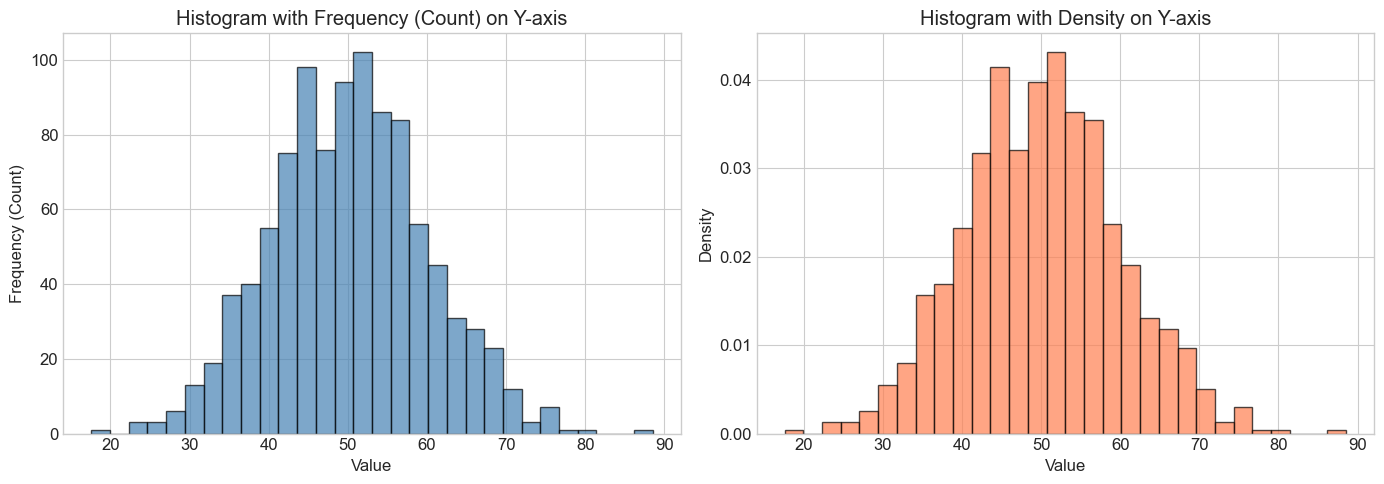

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Frequency histogram
axes[0].hist(continuous_data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency (Count)')
axes[0].set_title('Histogram with Frequency (Count) on Y-axis')

# Density histogram
axes[1].hist(continuous_data, bins=30, density=True, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('Histogram with Density on Y-axis')

plt.tight_layout()
plt.show()

## 2.3 Effect of Bin Width on Histogram

The choice of **bin width** significantly affects how we interpret the data distribution:
- **Too few bins**: Oversimplifies the distribution, loses detail
- **Too many bins**: Creates noise, makes it hard to see the pattern
- **Just right**: Reveals the true shape of the distribution

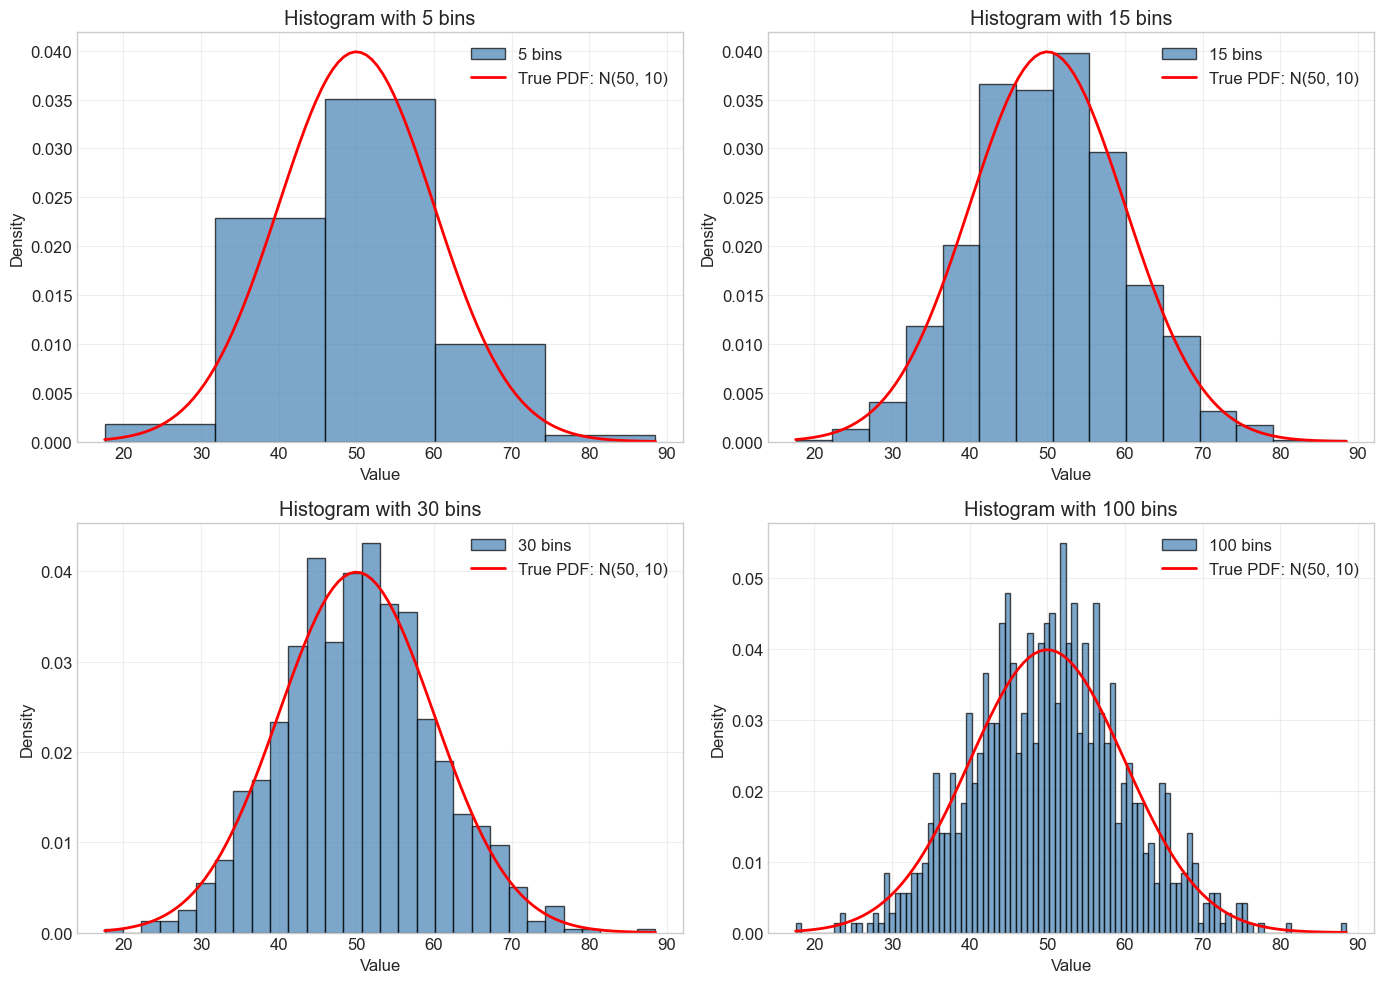

In [13]:
# Experiment with different bin widths
bin_counts = [5, 15, 30, 100]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, n_bins in zip(axes, bin_counts):
    ax.hist(continuous_data, bins=n_bins, density=True, color='steelblue', 
            edgecolor='black', alpha=0.7, label=f'{n_bins} bins')
    
    # Overlay true PDF
    x = np.linspace(min(continuous_data), max(continuous_data), 100)
    true_pdf = stats.norm.pdf(x, loc=50, scale=10)
    ax.plot(x, true_pdf, 'r-', linewidth=2, label='True PDF: N(50, 10)')
    
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram with {n_bins} bins')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Discussion: How Bin Size Affects Interpretation

| Bins | Effect |
|------|--------|
| **5 bins** | Too coarse - loses important distribution details, hard to see the bell curve |
| **15 bins** | Better resolution, overall shape visible but still chunky |
| **30 bins** | Good balance - captures distribution shape well, approximates the PDF nicely |
| **100 bins** | Too fine - noisy histogram, random fluctuations become apparent |

**Key Insight**: A density histogram provides an **empirical approximation to the PDF**. With appropriate bin size and sufficient data, it converges to the true underlying probability density function.

## 2.4 Density Histogram as Empirical PDF Approximation

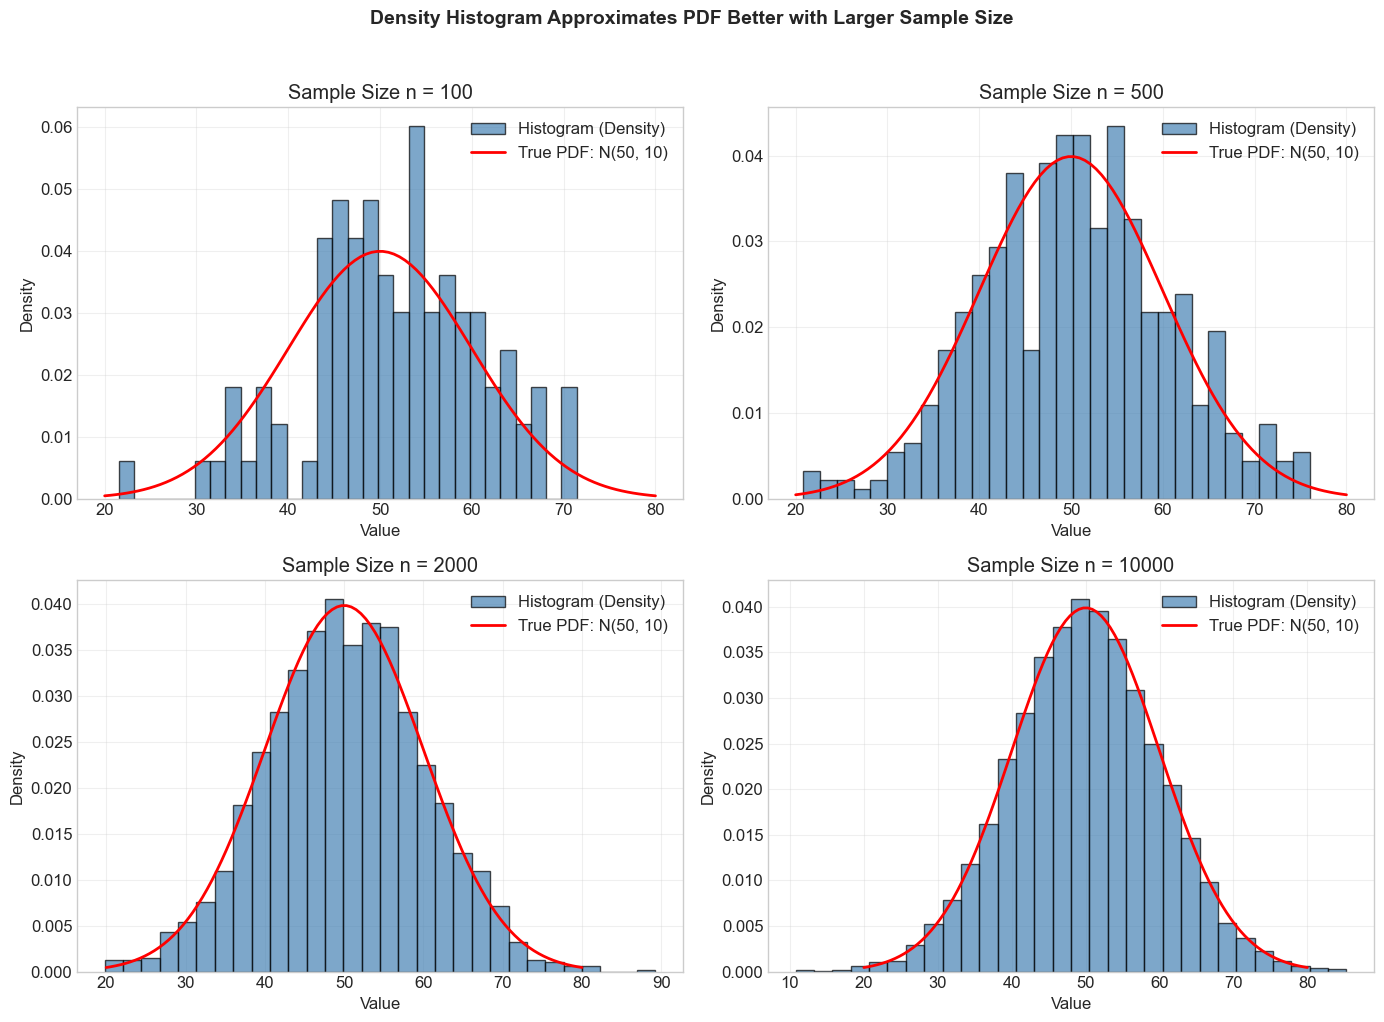

In [14]:
# Show how density histogram approximates PDF with increasing sample size
sample_sizes = [100, 500, 2000, 10000]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, n in zip(axes, sample_sizes):
    # Generate samples
    samples = np.random.normal(loc=50, scale=10, size=n)
    
    # Plot histogram
    ax.hist(samples, bins=30, density=True, color='steelblue', 
            edgecolor='black', alpha=0.7, label='Histogram (Density)')
    
    # Overlay true PDF
    x = np.linspace(20, 80, 100)
    true_pdf = stats.norm.pdf(x, loc=50, scale=10)
    ax.plot(x, true_pdf, 'r-', linewidth=2, label='True PDF: N(50, 10)')
    
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Sample Size n = {n}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Density Histogram Approximates PDF Better with Larger Sample Size', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Key Takeaway

The **density histogram** with y-axis as density:
1. Has total area equal to 1 (like a PDF)
2. Provides an **empirical approximation** to the true probability density function
3. Converges to the true PDF as sample size increases

---

# Part 3: Sampling Distribution and Population Distribution

---

## 3.1 Population vs Sample Distribution

- **Population Distribution**: The distribution of *all* values in the entire population
- **Sample Distribution**: The distribution of values in a *sample* drawn from the population

**Key Question**: Does the sample distribution approach the population distribution as sample size increases?

In [15]:
# Create a large "population" - mixture of two normal distributions
np.random.seed(42)
population_size = 100000

# Bimodal population: mixture of two normals
population = np.concatenate([
    np.random.normal(loc=30, scale=5, size=population_size // 2),
    np.random.normal(loc=60, scale=8, size=population_size // 2)
])

print(f"Population size: {len(population)}")
print(f"Population mean: {np.mean(population):.2f}")
print(f"Population std: {np.std(population):.2f}")

Population size: 100000
Population mean: 45.01
Population std: 16.43


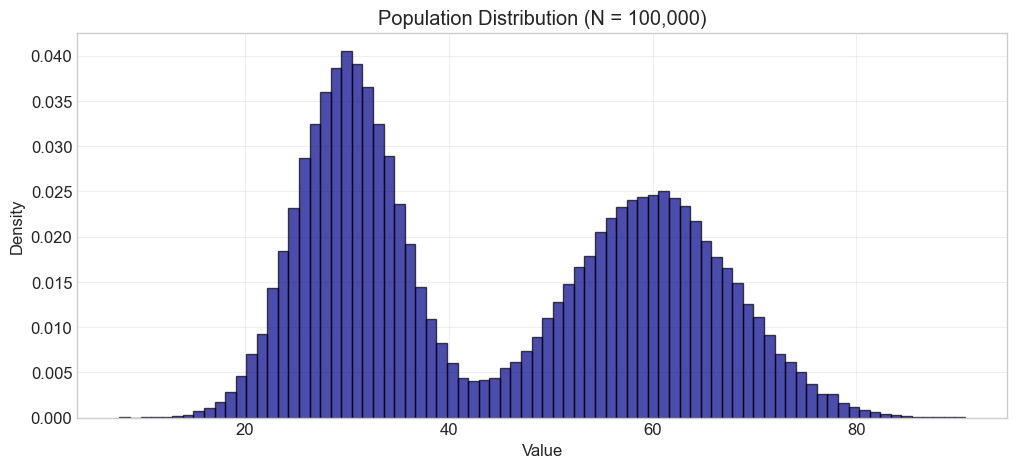

In [16]:
# Plot population distribution
plt.figure(figsize=(12, 5))
plt.hist(population, bins=80, density=True, color='darkblue', 
         edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Population Distribution (N = {len(population):,})')
plt.grid(True, alpha=0.3)
plt.show()

## 3.2 Sample Distributions with Increasing Sample Size

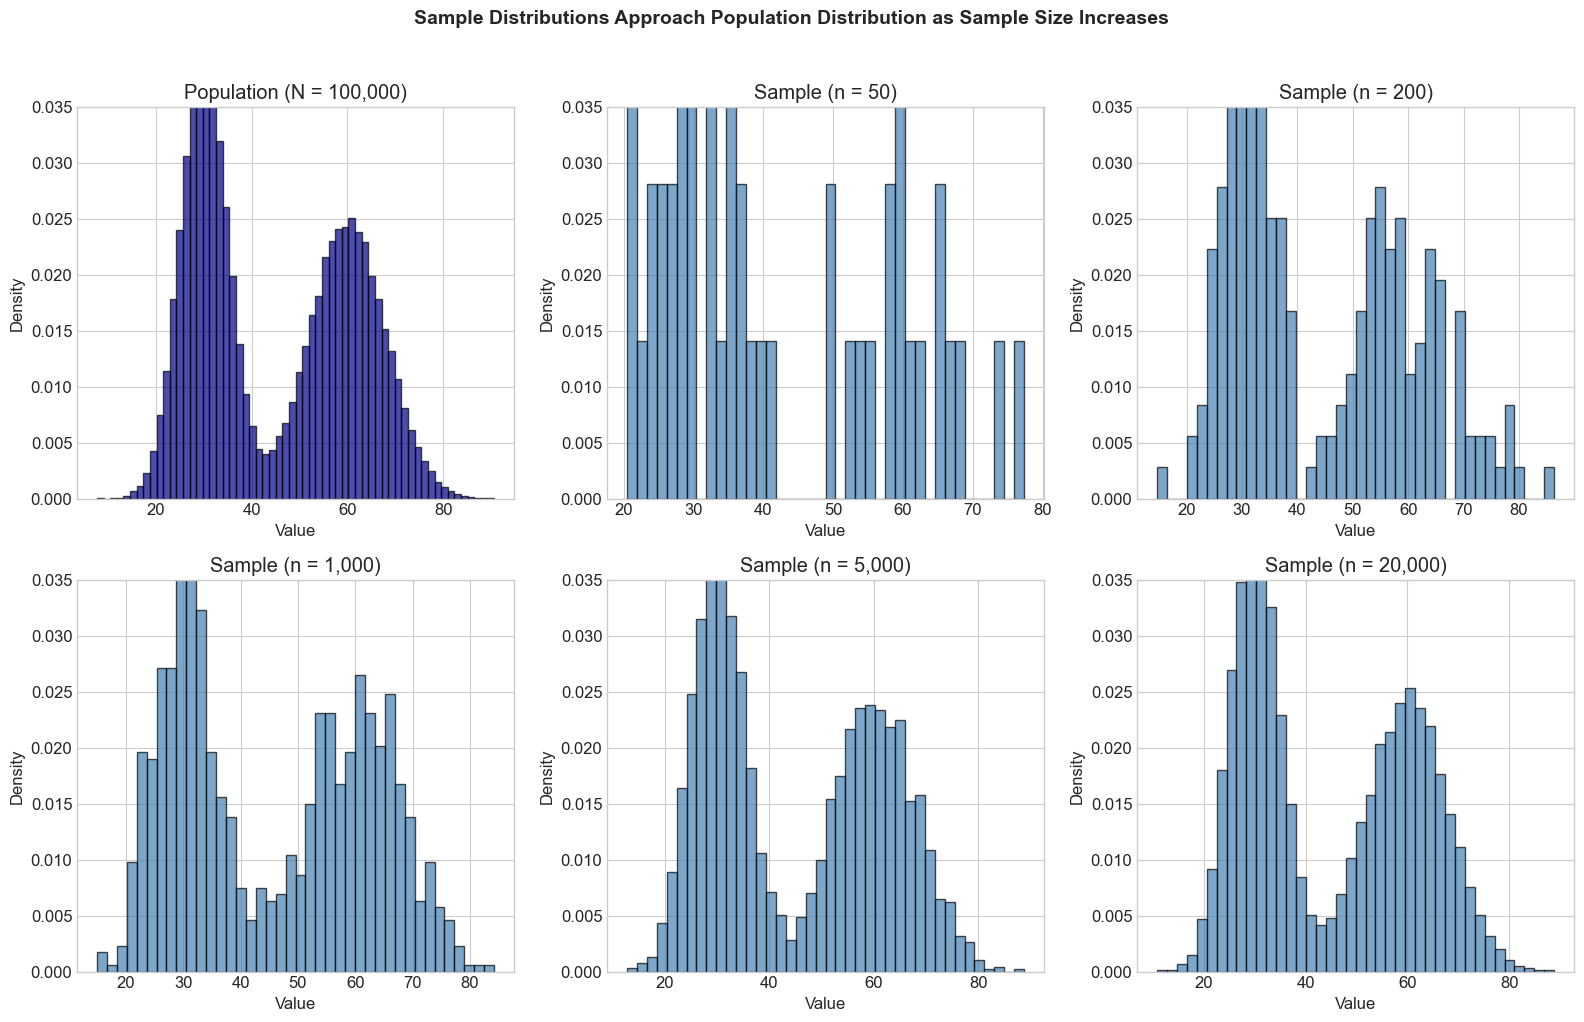

In [17]:
# Draw samples of increasing size
sample_sizes = [50, 200, 1000, 5000, 20000]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# First plot: Population distribution (reference)
axes[0].hist(population, bins=60, density=True, color='darkblue', 
             edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title(f'Population (N = {len(population):,})')
axes[0].set_ylim(0, 0.035)

# Sample distributions
for ax, n in zip(axes[1:], sample_sizes):
    sample = np.random.choice(population, size=n, replace=False)
    ax.hist(sample, bins=40, density=True, color='steelblue', 
            edgecolor='black', alpha=0.7)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Sample (n = {n:,})')
    ax.set_ylim(0, 0.035)

plt.suptitle('Sample Distributions Approach Population Distribution as Sample Size Increases', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 3.3 Quantitative Comparison: KL Divergence

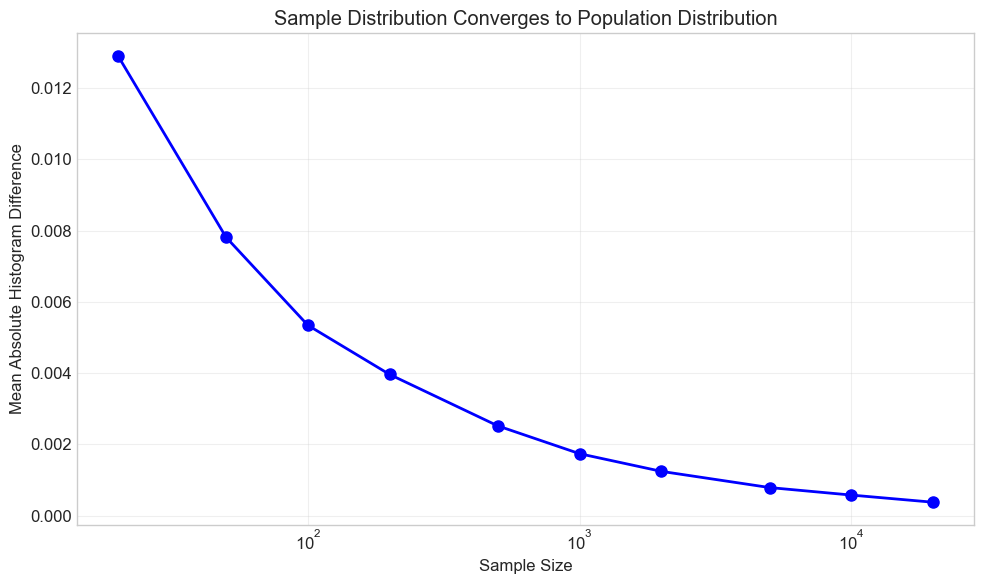


As sample size increases, the histogram difference decreases,
confirming that sample distribution approaches population distribution.


In [18]:
# Let's quantify how sample distribution approaches population distribution
# Using histogram bin comparison

def histogram_similarity(population, sample, bins=50):
    """Compute similarity between population and sample histograms"""
    range_min, range_max = population.min(), population.max()
    
    pop_hist, bin_edges = np.histogram(population, bins=bins, range=(range_min, range_max), density=True)
    sample_hist, _ = np.histogram(sample, bins=bins, range=(range_min, range_max), density=True)
    
    # Mean absolute difference between histograms
    return np.mean(np.abs(pop_hist - sample_hist))

sample_sizes_extended = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
differences = []

for n in sample_sizes_extended:
    diffs = []
    for _ in range(10):  # Average over 10 samples
        sample = np.random.choice(population, size=n, replace=True)
        diffs.append(histogram_similarity(population, sample))
    differences.append(np.mean(diffs))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_extended, differences, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Sample Size')
plt.ylabel('Mean Absolute Histogram Difference')
plt.title('Sample Distribution Converges to Population Distribution')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAs sample size increases, the histogram difference decreases,")
print("confirming that sample distribution approaches population distribution.")

### Conclusion

As the sample size increases:
1. The sample distribution becomes a better approximation of the population distribution
2. The histogram of the sample more closely matches the population histogram
3. Statistical properties (mean, variance, shape) of the sample converge to population values

This is a manifestation of the **Law of Large Numbers** applied to the entire distribution!

---

# Part 4: Law of Large Numbers (LLN) and Central Limit Theorem (CLT)

---

## 4.1 Law of Large Numbers (LLN)

### Statement
As the sample size $n$ increases, the sample mean $\bar{X}_n$ converges to the population mean $\mu$:

$$\bar{X}_n = \frac{1}{n}\sum_{i=1}^{n} X_i \xrightarrow{n \to \infty} \mu$$

### Intuition
With more data, random fluctuations "average out" and the sample mean becomes a more precise estimate of the true population mean.

In [19]:
# Create a population
np.random.seed(42)
population_lln = np.random.exponential(scale=5, size=100000)  # Mean = 5
true_mean = np.mean(population_lln)

print(f"Population: Exponential distribution with scale=5")
print(f"True population mean (μ): {true_mean:.4f}")

Population: Exponential distribution with scale=5
True population mean (μ): 4.9799


In [20]:
# LLN Demonstration: Sample means for increasing sample sizes
sample_sizes_lln = np.arange(1, 5001, 10)

# Run multiple trials
n_trials = 5
all_means = []

for trial in range(n_trials):
    np.random.seed(trial * 100)
    running_means = []
    for n in sample_sizes_lln:
        sample = np.random.choice(population_lln, size=n, replace=True)
        running_means.append(np.mean(sample))
    all_means.append(running_means)

all_means = np.array(all_means)

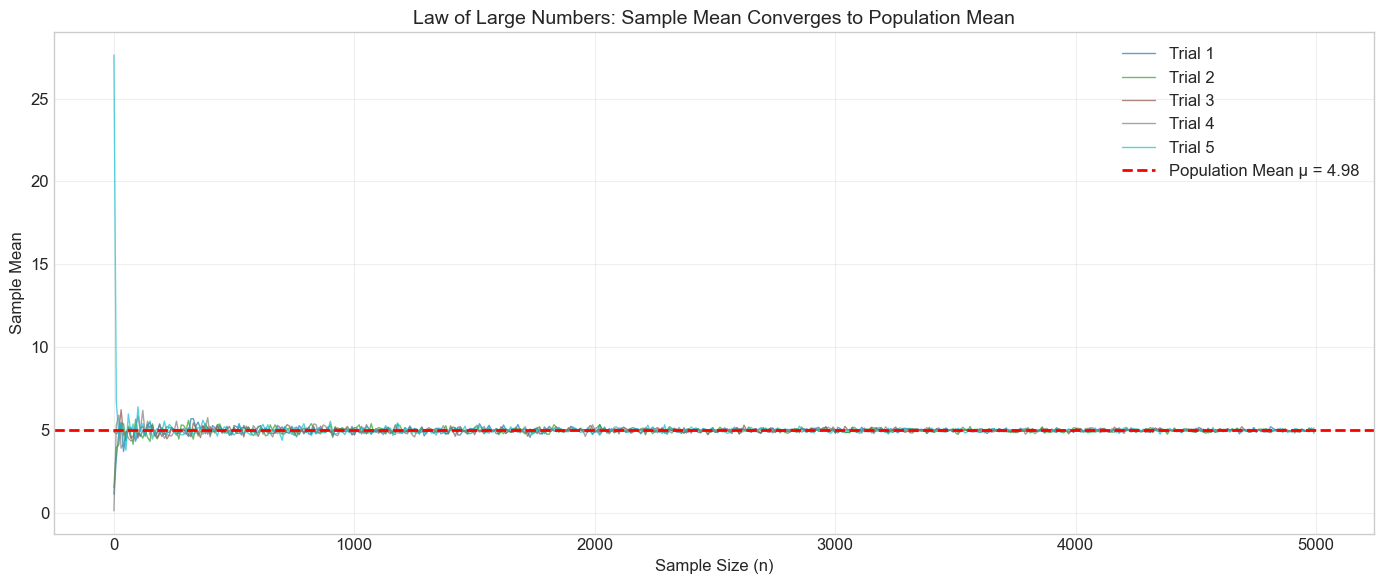


Observation: As sample size increases, all sample means converge to the population mean.
At n=5000, the sample means deviate from μ by at most 0.1853


In [21]:
# Plot LLN demonstration
plt.figure(figsize=(14, 6))

colors = plt.cm.tab10(np.linspace(0, 1, n_trials))
for i in range(n_trials):
    plt.plot(sample_sizes_lln, all_means[i], alpha=0.7, color=colors[i], 
             label=f'Trial {i+1}', linewidth=1)

plt.axhline(true_mean, color='red', linestyle='--', linewidth=2, 
            label=f'Population Mean μ = {true_mean:.2f}')

plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Sample Mean', fontsize=12)
plt.title('Law of Large Numbers: Sample Mean Converges to Population Mean', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nObservation: As sample size increases, all sample means converge to the population mean.")
print(f"At n=5000, the sample means deviate from μ by at most {np.max(np.abs(all_means[:, -1] - true_mean)):.4f}")

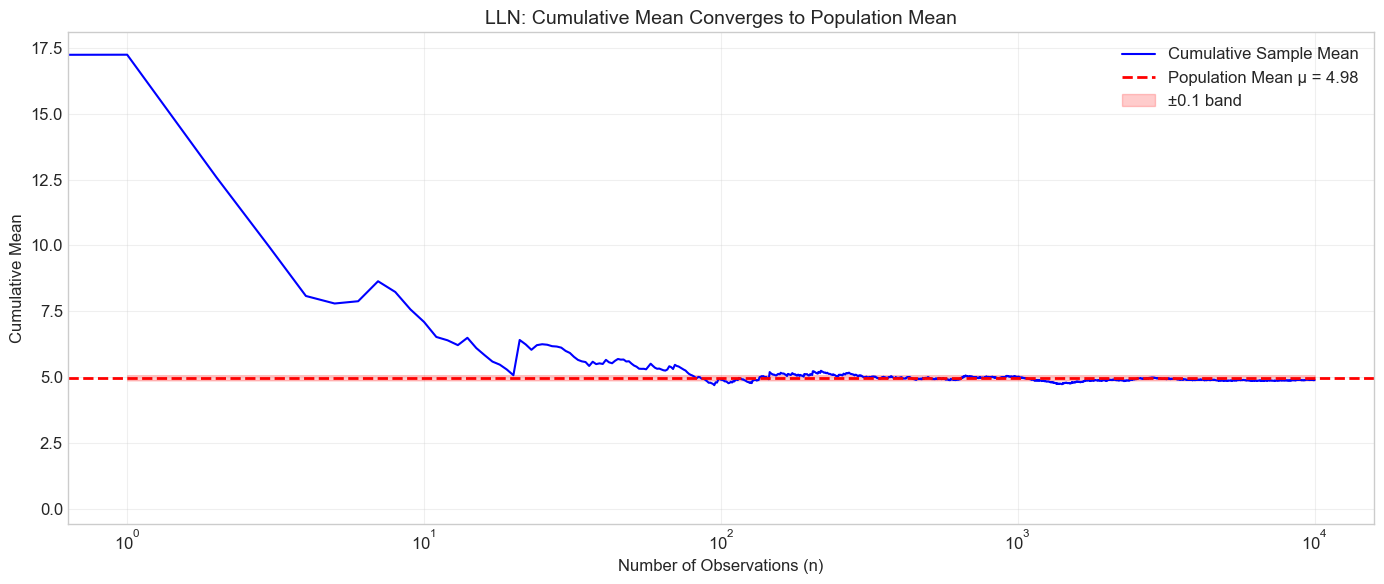

In [22]:
# Show convergence more clearly with cumulative mean
np.random.seed(123)
large_sample = np.random.choice(population_lln, size=10000, replace=True)

cumulative_means = np.cumsum(large_sample) / np.arange(1, len(large_sample) + 1)

plt.figure(figsize=(14, 6))
plt.plot(cumulative_means, 'b-', linewidth=1.5, label='Cumulative Sample Mean')
plt.axhline(true_mean, color='red', linestyle='--', linewidth=2, 
            label=f'Population Mean μ = {true_mean:.2f}')

# Add confidence band
plt.fill_between(range(1, len(cumulative_means)+1), 
                 true_mean - 0.1, true_mean + 0.1, 
                 alpha=0.2, color='red', label='±0.1 band')

plt.xlabel('Number of Observations (n)', fontsize=12)
plt.ylabel('Cumulative Mean', fontsize=12)
plt.title('LLN: Cumulative Mean Converges to Population Mean', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.tight_layout()
plt.show()

---

## 4.2 Central Limit Theorem (CLT)

### Statement
For a population with mean $\mu$ and finite variance $\sigma^2$, the distribution of sample means from samples of size $n$ approaches a **normal distribution** as $n$ increases:

$$\bar{X}_n \sim N\left(\mu, \frac{\sigma^2}{n}\right) \text{ as } n \to \infty$$

The standardized version:
$$Z = \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} \sim N(0, 1)$$

### Key Points
- Works **regardless** of the shape of the original population distribution!
- The distribution of sample means becomes normal even if the population is not normal
- Larger $n$ = faster convergence to normality

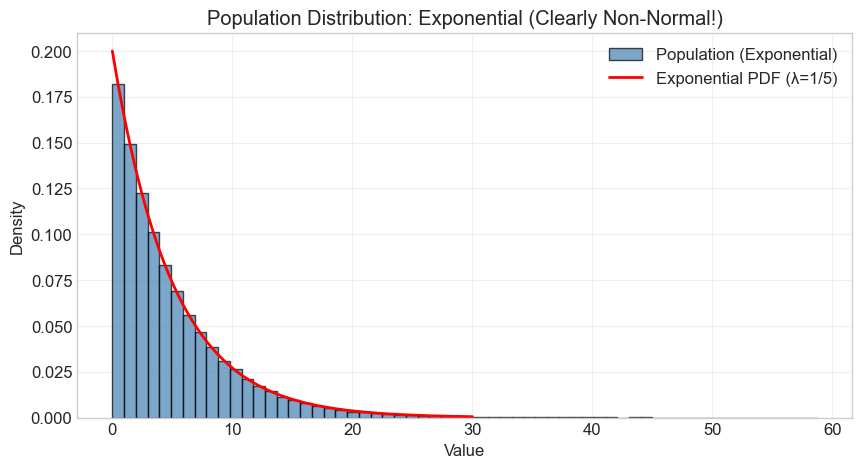

Notice: The population is highly right-skewed (exponential distribution)
CLT tells us the distribution of SAMPLE MEANS will still be approximately normal!


In [23]:
# CLT Demonstration: Use exponential distribution (clearly non-normal)
np.random.seed(42)

# Population parameters
scale = 5  # Mean = scale for exponential
pop_mean = scale
pop_std = scale  # std = mean for exponential

# Show population distribution
plt.figure(figsize=(10, 5))
x = np.linspace(0, 30, 1000)
plt.hist(population_lln, bins=60, density=True, alpha=0.7, color='steelblue', 
         edgecolor='black', label='Population (Exponential)')
pdf = stats.expon.pdf(x, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label=f'Exponential PDF (λ=1/{scale})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Population Distribution: Exponential (Clearly Non-Normal!)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Notice: The population is highly right-skewed (exponential distribution)")
print("CLT tells us the distribution of SAMPLE MEANS will still be approximately normal!")

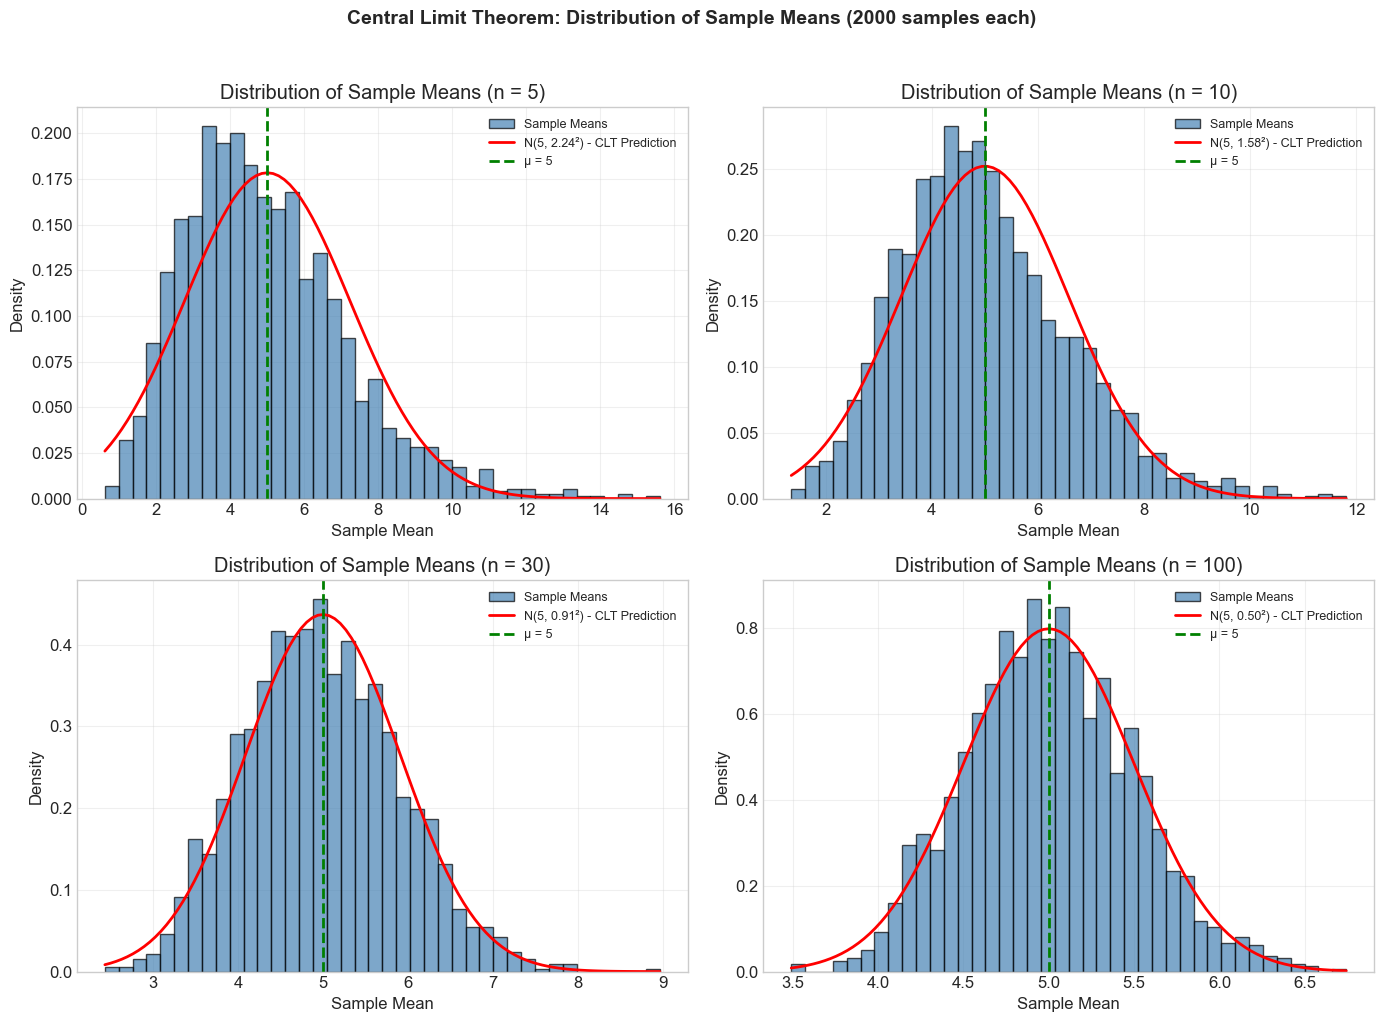

In [24]:
# Draw multiple samples and compute their means
n_samples = 2000  # Number of samples to draw
sample_sizes_clt = [5, 10, 30, 100]  # Different sample sizes to try

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, n in zip(axes, sample_sizes_clt):
    # Draw n_samples samples of size n and compute their means
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population_lln, size=n, replace=True)
        sample_means.append(np.mean(sample))
    sample_means = np.array(sample_means)
    
    # Plot histogram of sample means
    ax.hist(sample_means, bins=40, density=True, alpha=0.7, color='steelblue', 
            edgecolor='black', label='Sample Means')
    
    # Overlay theoretical normal distribution (predicted by CLT)
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    theoretical_std = pop_std / np.sqrt(n)
    normal_pdf = stats.norm.pdf(x, loc=pop_mean, scale=theoretical_std)
    ax.plot(x, normal_pdf, 'r-', linewidth=2, 
            label=f'N({pop_mean}, {theoretical_std:.2f}²) - CLT Prediction')
    
    ax.axvline(pop_mean, color='green', linestyle='--', linewidth=2, 
               label=f'μ = {pop_mean}')
    
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of Sample Means (n = {n})')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle(f'Central Limit Theorem: Distribution of Sample Means ({n_samples} samples each)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Observations from CLT Demonstration

1. **n = 5**: Distribution of sample means is still somewhat skewed (not quite normal yet)

2. **n = 10**: Starting to look more symmetric and bell-shaped

3. **n = 30**: Distribution is approximately normal (this is often cited as the "rule of thumb" threshold)

4. **n = 100**: Distribution is very close to normal, matching the theoretical prediction well

### Key Insights

- Even though our population was **exponential** (highly skewed), the distribution of sample means becomes **normal**!
- The red curve (theoretical normal) matches the histogram better as $n$ increases
- The spread of sample means **decreases** with larger $n$ (standard error = $\sigma/\sqrt{n}$)

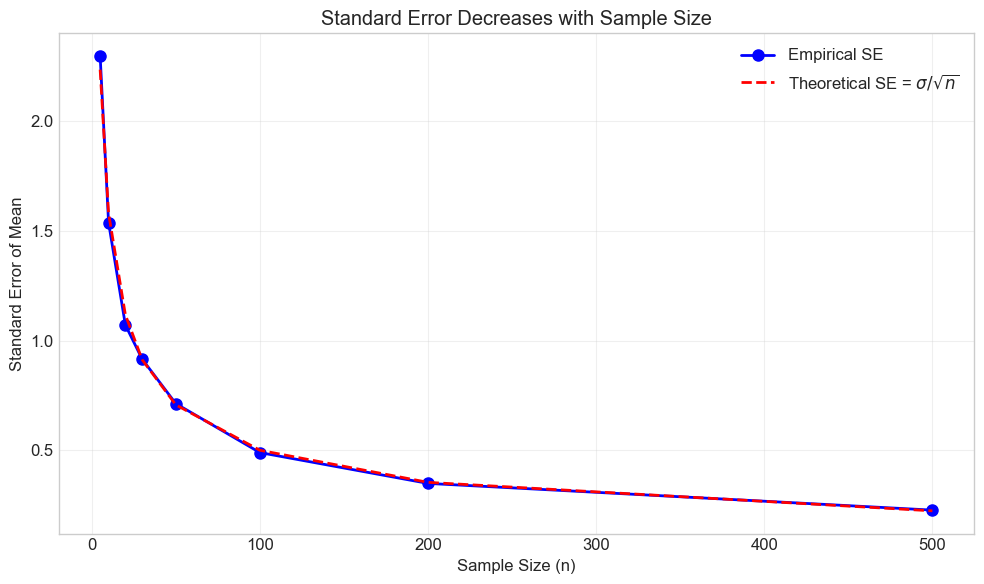

In [25]:
# Verification: Standard error decreases with sample size
sample_sizes_se = [5, 10, 20, 30, 50, 100, 200, 500]
empirical_se = []
theoretical_se = []

for n in sample_sizes_se:
    # Draw many samples and compute their means
    sample_means = [np.mean(np.random.choice(population_lln, size=n, replace=True)) 
                    for _ in range(1000)]
    empirical_se.append(np.std(sample_means))
    theoretical_se.append(pop_std / np.sqrt(n))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_se, empirical_se, 'bo-', linewidth=2, markersize=8, label='Empirical SE')
plt.plot(sample_sizes_se, theoretical_se, 'r--', linewidth=2, label=r'Theoretical SE = $\sigma/\sqrt{n}$')
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error of Mean')
plt.title('Standard Error Decreases with Sample Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## Summary

### Part 1: Mean and Median
- **Mean**: Minimizes sum of squared distances
- **Median**: Minimizes sum of absolute distances
- In **left-skewed** distributions: Mean < Median
- In **right-skewed** distributions: Mean > Median

### Part 2: Histograms
- **Frequency histograms**: Show counts
- **Density histograms**: Approximate PDF (area = 1)
- Bin width significantly affects interpretation

### Part 3: Sample vs Population Distribution
- As sample size increases, sample distribution approaches population distribution

### Part 4: LLN and CLT
- **LLN**: Sample mean → Population mean as n → ∞
- **CLT**: Distribution of sample means → Normal, regardless of population shape
- Standard error = σ/√n decreases with sample size

---

## Practice Exercises

1. **Mean vs Median**: Create a dataset with outliers and observe how mean and median are affected.

2. **Histogram Exploration**: Generate data from different distributions (uniform, beta, gamma) and experiment with bin sizes.

3. **CLT with Different Distributions**: Try CLT demonstration with uniform, bimodal, or other non-normal distributions.

4. **Sample Size Investigation**: For what sample size does the distribution of sample means become "acceptably normal" for a uniform distribution?